In [6]:
import pandas as pd

cabdata_dataset = pd.read_csv('/content/Cab_Data.csv')
cabdata_dataset.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
city_dataset = pd.read_csv('/content/City.csv')
city_dataset.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
cust_dataset = pd.read_csv('/content/Customer_ID.csv')
cust_dataset.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
tra_dataset = pd.read_csv('/content/Transaction_ID.csv')
tra_dataset.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


From analysing the different datasets we can combine the following into one: Cab_Data, Customer_ID, Transaction_ID. We use the pd.merge() function to do that.

In [9]:
combined_data = pd.merge(tra_dataset, cust_dataset)
combined_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [10]:
combine_all_data = pd.merge(combined_data, cabdata_dataset)
combine_all_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


Now that the data is combined, we can perform EDA on it. First we remove duplicate and null values, then we remove any outliers.

0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 359392, dtype: bool

Any null values:


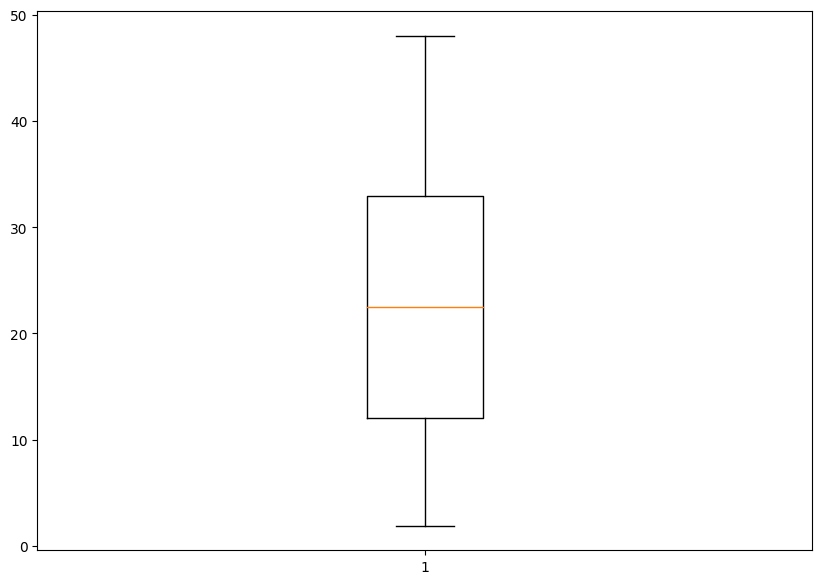

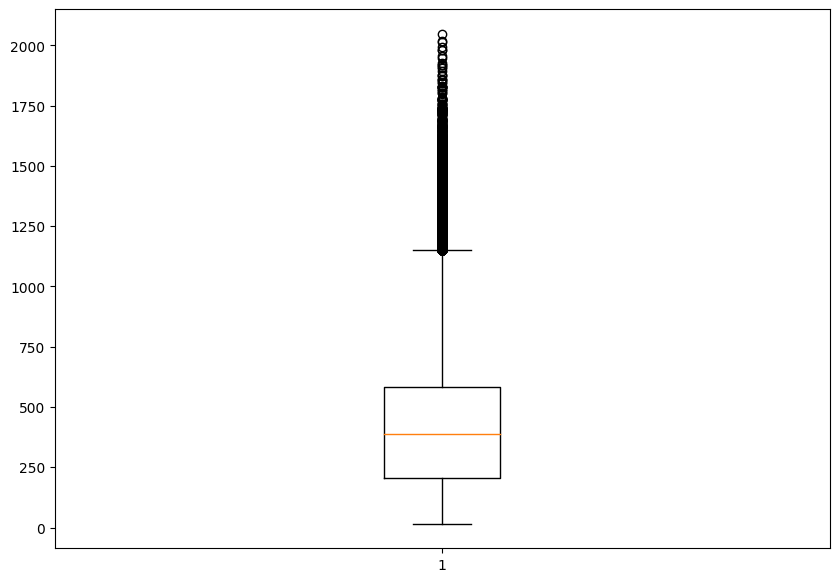

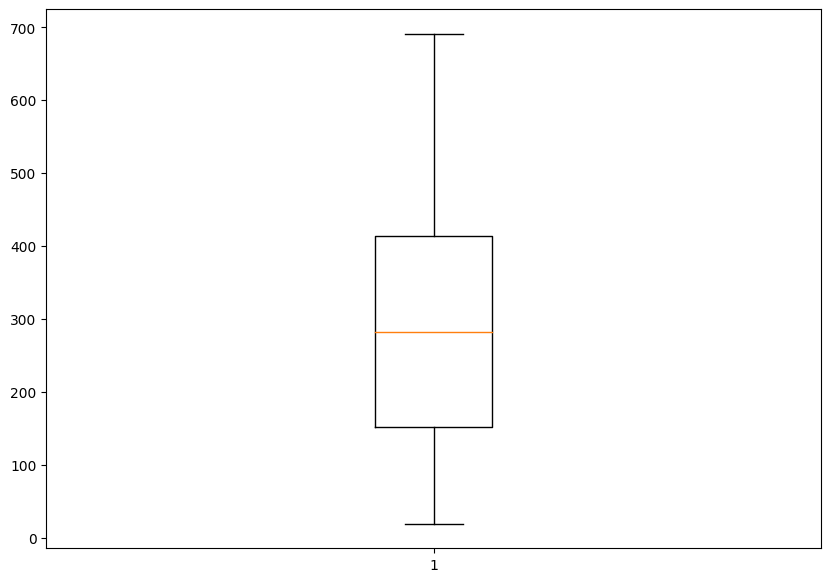

In [21]:
import matplotlib.pyplot as plt


duplicate_rows = combine_all_data.duplicated()
print(duplicate_rows)
print()

print('Any null values:' )
combine_all_data.isnull().values.any()


data = [combine_all_data['KM Travelled']]
fig = plt.figure(figsize = (10,7))
plt.boxplot(data)
plt.show()

data1 = combine_all_data['Price Charged']
fig = plt.figure(figsize = (10,7))
plt.boxplot(data1)
plt.show()

data2 = combine_all_data['Cost of Trip']
fig = plt.figure(figsize = (10,7))
plt.boxplot(data2)
plt.show()

Hypothesis to investigate:
- Customer Loyalty and Frequency of Rides
- Average Transaction Value
- Customer Demographics and Preferences
- Seasonal Variations in Ride Volume
- Impact of Customer Experience on Revenue

Hypothesis 1: Customer Loyalty and Frequency of Rides

Hypothesis: Customers who use Company A's cab services show higher loyalty, reflected in a greater number of rides per month compared to Company B's customers.

Rationale: This hypothesis aims to understand customer loyalty and satisfaction indirectly through the frequency of usage. Higher ride frequency by customers of one company could indicate better service quality or customer satisfaction.